In [1]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
company_name = input("Enter the name of company")

Enter the name of companyMSFT


In [3]:
df = pdr.get_data_tiingo(company_name, api_key = '6893d5ea1530c62591c55ef4b19a16fd4420ba4e')

C:\Users\Aditya\AppData\Local\Temp\ipykernel_26716\49039829.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo(company_name, api_key = '6893d5ea1530c62591c55ef4b19a16fd4420ba4e')


In [4]:
df.to_csv(company_name + '.csv')

In [5]:
df = pd.read_csv(company_name + '.csv')
df.head()
# df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2018-01-04 00:00:00+00:00,87.11,87.66,86.57,86.59,21145985,82.014468,82.532296,81.506056,81.524886,21145985,0.0,1.0
1,MSFT,2018-01-05 00:00:00+00:00,88.19,88.41,87.43,87.66,22526563,83.031293,83.238424,82.315750,82.532296,22526563,0.0,1.0
2,MSFT,2018-01-08 00:00:00+00:00,88.28,88.58,87.60,88.20,20293930,83.116028,83.398480,82.475805,83.040708,20293930,0.0,1.0
3,MSFT,2018-01-09 00:00:00+00:00,88.22,88.73,87.86,88.65,19390427,83.059538,83.539706,82.720597,83.464385,19390427,0.0,1.0
4,MSFT,2018-01-10 00:00:00+00:00,87.82,88.19,87.41,87.86,18129153,82.682936,83.031293,82.296919,82.720597,18129153,0.0,1.0


In [6]:
df1 = df.reset_index()['close'] # with closing values
# df2 = df.reset_index()['open'] # with opening values

In [7]:

# df2.head()

SyntaxError: invalid syntax (680608515.py, line 1)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_26716\2609594420.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


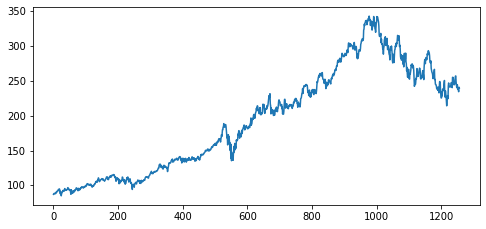

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(df1)

# plt.subplot(2,1,2)
# plt.plot(df2)

In [9]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
# # data_train2, data_test2 = train_test_split(df2, test_size=0.3, random_state=42)
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
train_data

array([[0.00813638],
       [0.01232081],
       [0.01266951],
       [0.01243704],
       [0.01088725],
       [0.01189461],
       [0.0177838 ],
       [0.01294072],
       [0.01987602],
       [0.01972104],
       [0.01933359],
       [0.02557148],
       [0.02669508],
       [0.02638512],
       [0.0283611 ],
       [0.03506393],
       [0.0345215 ],
       [0.02994963],
       [0.03874467],
       [0.03583882],
       [0.02623014],
       [0.01158466],
       [0.02448663],
       [0.01782255],
       [0.        ],
       [0.01228206],
       [0.01596281],
       [0.01867493],
       [0.02247191],
       [0.02963967],
       [0.02708253],
       [0.02987214],
       [0.02510655],
       [0.02603642],
       [0.03506393],
       [0.0403332 ],
       [0.03560635],
       [0.03394033],
       [0.03037582],
       [0.03115072],
       [0.03343665],
       [0.03219682],
       [0.03428904],
       [0.03649748],
       [0.04467261],
       [0.04556373],
       [0.03641999],
       [0.034

In [11]:
def create_dataset(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step -1):
        a = dataset[i: i+time_step ,0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
x_train, y_train = create_dataset(train_data,time_step=100)
x_test, y_test = create_dataset(test_data,time_step=100)
# x_train2, y_train2 = create_dataset(data_train2,time_step=100)
# x_test2, y_test2 = create_dataset(data_test2,time_step=100)

In [13]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
# x_train2 = x_train2.reshape(x_train2.shape[0],x_train2.shape[1],1)
# x_test2 = x_test2.reshape(x_test2.shape[0],x_test2.shape[1],1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [15]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [16]:
model.summary()
model.save('dl_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 305ms/step - loss: 0.0271 - val_loss: 0.0678
Epoch 2/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0059 - val_loss: 0.0035
Epoch 3/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 4/100
12/12 [==============================] - 3s 235ms/step - loss: 9.3152e-04 - val_loss: 0.0030
Epoch 5/100
12/12 [==============================] - 3s 239ms/step - loss: 7.7182e-04 - val_loss: 0.0037
Epoch 6/100
12/12 [==============================] - 3s 232ms/step - loss: 7.8252e-04 - val_loss: 0.0031
Epoch 7/100
12/12 [==============================] - 3s 234ms/step - loss: 7.0077e-04 - val_loss: 0.0028
Epoch 8/100
12/12 [==============================] - 3s 249ms/step - loss: 7.3971e-04 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 2s 192ms/step - loss: 7.3385e-04 - val_loss: 0.0029
Epoch 10/100
12/12 [==============================] - 2s 180ms/ste

In [18]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


11/11 [==============================] - 0s 37ms/step


In [19]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [20]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

161.7743222293168

In [21]:
math.sqrt(mean_squared_error(y_test,test_predict))

278.096070395753

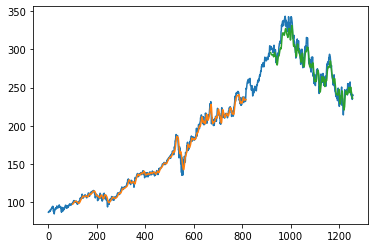

In [22]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
x_input = test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape
len(test_data)

440

In [30]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [31]:
temp_input

[0.7909724912824486,
 0.7826811313444401,
 0.8016272762495157,
 0.8076714451762882,
 0.8047268500581167,
 0.7993413405656721,
 0.7948857032158078,
 0.7793103448275861,
 0.7467648198372724,
 0.7416892677256876,
 0.7391708640061992,
 0.7510267338240991,
 0.7093374660984112,
 0.6982564897326616,
 0.689500193723363,
 0.6836884928322357,
 0.6795428128632311,
 0.6627276249515691,
 0.6518403719488569,
 0.6705927934908948,
 0.672258814413018,
 0.6952731499418828,
 0.703758233242929,
 0.6469585432003099,
 0.6478496706702828,
 0.6213483146067414,
 0.6188686555598605,
 0.6180162727624952,
 0.6099961255327391,
 0.5964354901201083,
 0.6043006586594342,
 0.5924447888415342,
 0.5906237892289808,
 0.5865943432777992,
 0.6046493607129019,
 0.5908175125920185,
 0.5729949631925609,
 0.6033707865168539,
 0.6349089500193722,
 0.6361487795428128,
 0.6268113134444013,
 0.5781867493219682,
 0.5588531576908174,
 0.5439752034095311,
 0.5452925222781867,
 0.5781867493219682,
 0.5561797752808988,
 0.5909337466098

In [32]:
lst_output = []
n_steps = 100
i = 0
while i<30:
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

In [62]:
new_days = np.arange(1,101)
pred_days = np.arange(101,131)

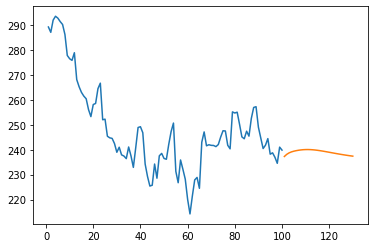

In [63]:
plt.plot(new_days,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(pred_days,scaler.inverse_transform(lst_output))

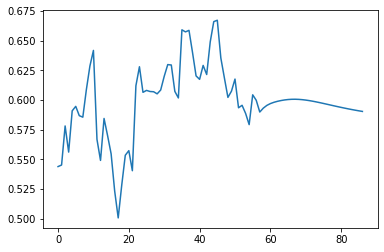

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

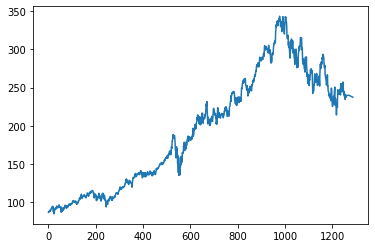

In [55]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)